In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Load saved credentials
service = QiskitRuntimeService()

In [2]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [3]:
#You can also specify project if you are part of any:
#service = QiskitRuntimeService(instance="ibm-q/open/main")

In [4]:
backend = service.backend("ibm_sherbrooke")
 
print(
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_sherbrooke
Version: 2
No. of qubits: 127



In [5]:
backend.qubit_properties(0)  

QubitProperties(t1=0.00041489406820679965, t2=0.00013263081720707806, frequency=4635662846.425661)

In [6]:
backend.target["ecr"][(1, 0)]

InstructionProperties(duration=5.333333333333332e-07, error=0.005666189486269041, calibration=PulseQobj)

In [7]:
backend.target["measure"][(0,)]

InstructionProperties(duration=1.216e-06, error=0.02210000000000001, calibration=PulseQobj)

In [8]:
config = backend.configuration()

In [9]:
# Basic Features
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibm_sherbrooke, and is on version 1.6.8. It has 127 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['ecr', 'id', 'rz', 'sx', 'x'].


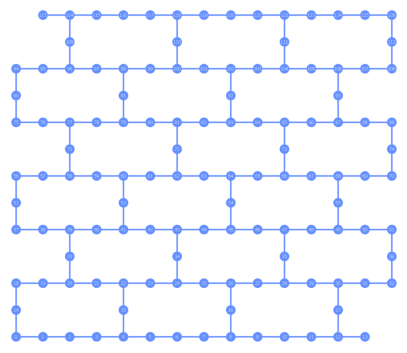

In [93]:
from qiskit.visualization import plot_gate_map
plot_gate_map(backend, figsize=(5,5))

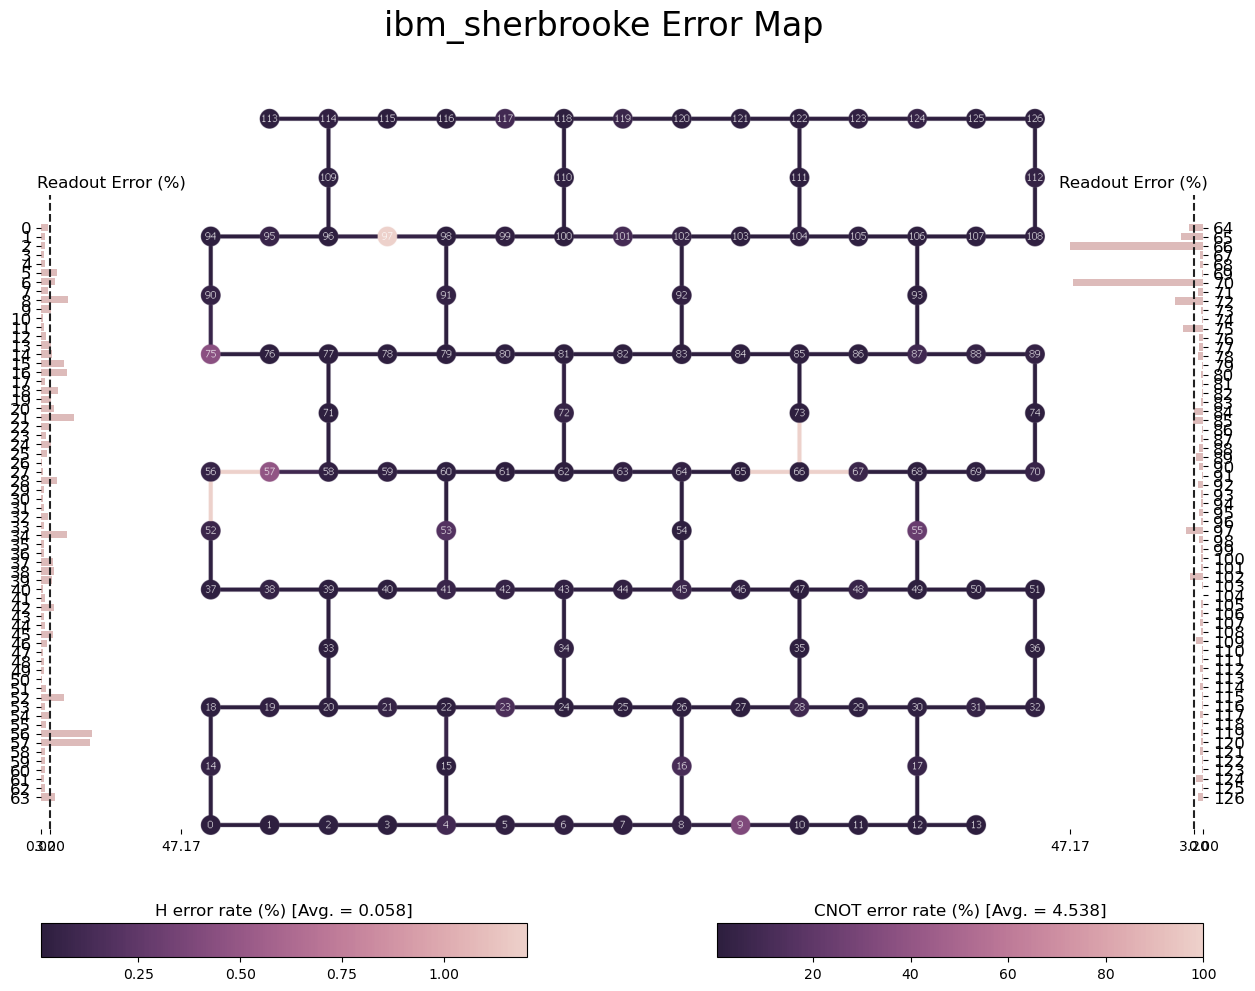

In [17]:
from qiskit.visualization import plot_error_map
plot_error_map(backend)

In [18]:
props = backend.properties()

In [28]:
from pprint import pprint
pprint(vars(props))

{'_data': {'general_qlists': [{'name': 'lf_4', 'qubits': [124, 123, 122, 121]},
                              {'name': 'lf_5',
                               'qubits': [125, 124, 123, 122, 121]},
                              {'name': 'lf_6',
                               'qubits': [126, 125, 124, 123, 122, 121]},
                              {'name': 'lf_7',
                               'qubits': [112, 126, 125, 124, 123, 122, 121]},
                              {'name': 'lf_8',
                               'qubits': [112,
                                          126,
                                          125,
                                          124,
                                          123,
                                          122,
                                          121,
                                          120]},
                              {'name': 'lf_9',
                               'qubits': [108,
                                      

In [29]:
def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 414.89406820679966 microseconds
  - T2 time of 132.63081720707805 microseconds
  - U2 gate error of 0.00018167175479708337
  - U2 gate duration of 56.888888888888886 nanoseconds
  - resonant frequency of 4.635662846425661 GHz


# Transpilation

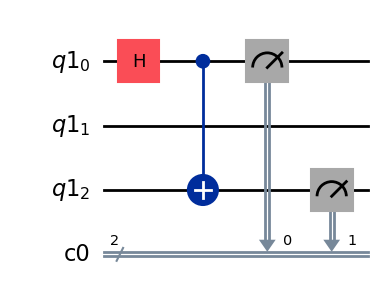

In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[2])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[2], cr[1])

circuit.draw(output='mpl')

In [65]:
print(circuit.depth())
print(circuit.count_ops())
print(circuit.num_nonlocal_gates())

3
OrderedDict([('measure', 2), ('h', 1), ('cx', 1)])
1


In [51]:
from qiskit.compiler import transpile
transpiled_circuit = transpile(circuit, backend)

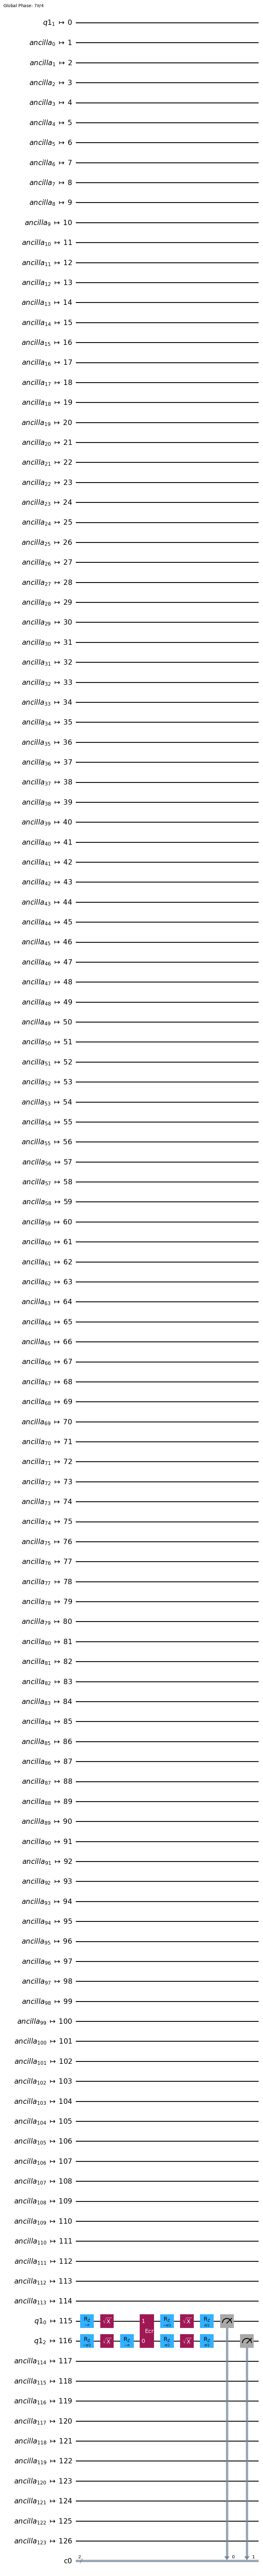

In [53]:
transpiled_circuit.draw(output='mpl')

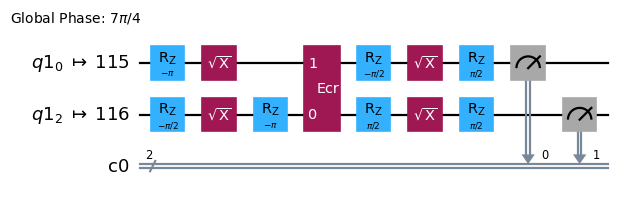

In [94]:
transpiled_circuit.draw(output='mpl', scale=0.8, idle_wires=False)

In [72]:
print('Depth: ', transpiled_circuit.depth())
print(transpiled_circuit.count_ops())
print('Non-local gates: ', transpiled_circuit.num_nonlocal_gates())

Depth:  8
OrderedDict([('rz', 7), ('sx', 4), ('measure', 2), ('ecr', 1)])
Non-local gates:  1


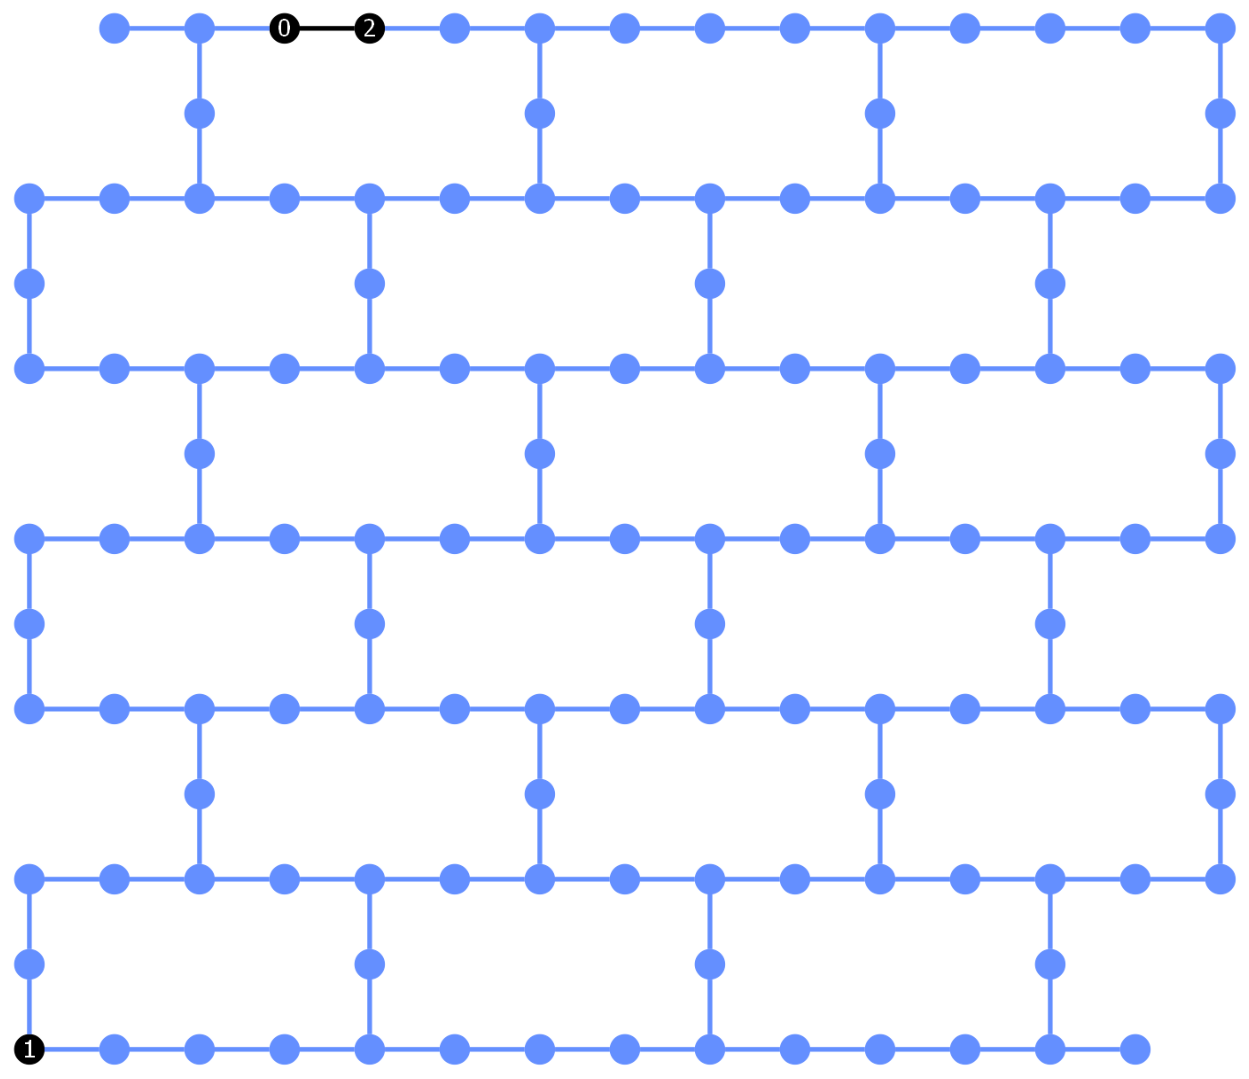

In [92]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(transpiled_circuit, backend)

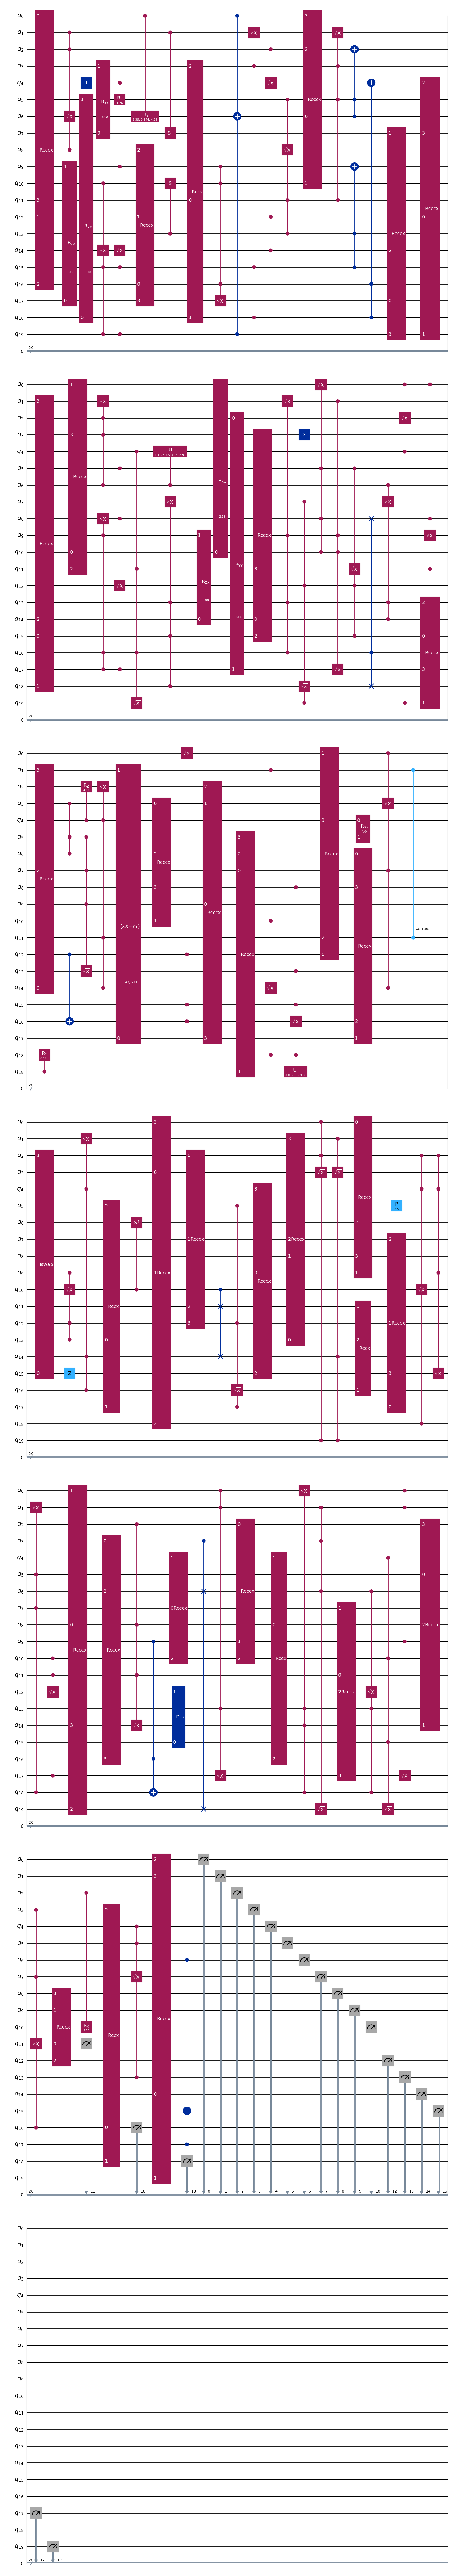

In [71]:
from qiskit.circuit.random import random_circuit
 
qc = random_circuit(20, 20, measure=True)
qc.draw(output='mpl')

In [73]:
print('Depth: ', qc.depth())
print(qc.count_ops())
print('Non-local gates: ', qc.num_nonlocal_gates())

Depth:  21
OrderedDict([('c3sx', 45), ('rcccx', 29), ('measure', 20), ('ccx', 6), ('rccx', 5), ('rzx', 3), ('rxx', 3), ('cswap', 3), ('crz', 2), ('cu3', 2), ('csdg', 2), ('id', 1), ('cs', 1), ('ryy', 1), ('cu', 1), ('x', 1), ('ccz', 1), ('cx', 1), ('cry', 1), ('xx_plus_yy', 1), ('rzz', 1), ('iswap', 1), ('z', 1), ('p', 1), ('dcx', 1), ('crx', 1)])
Non-local gates:  111


In [75]:
qc_d=qc.decompose()
print('Depth: ', qc_d.depth())
print(qc_d.count_ops())
print('Non-local gates: ', qc_d.num_nonlocal_gates())

Depth:  379
OrderedDict([('h', 664), ('cx', 544), ('cu1', 315), ('u1', 258), ('u2', 126), ('t', 24), ('measure', 20), ('rz', 18), ('tdg', 18), ('p', 12), ('u3', 7), ('rx', 4), ('ccx', 4), ('ry', 4), ('u', 3), ('s', 3), ('id', 1), ('sx', 1), ('sxdg', 1), ('sdg', 1)])
Non-local gates:  863


In [76]:
qc_t = transpile(qc, backend)

print('Depth: ', qc_t.depth())
print(qc_t.count_ops())
print('Non-local gates: ', qc_t.num_nonlocal_gates())

Depth:  4680
OrderedDict([('rz', 10027), ('sx', 7337), ('ecr', 3867), ('x', 515), ('measure', 20)])
Non-local gates:  3867


In [96]:
qc_t = transpile(qc, backend, optimization_level=0)

print('Depth: ', qc_t.depth())
print(qc_t.count_ops())
print('Non-local gates: ', qc_t.num_nonlocal_gates())

Depth:  11350
OrderedDict([('rz', 37494), ('sx', 18685), ('ecr', 5979), ('x', 1201), ('measure', 20), ('id', 1)])
Non-local gates:  5979


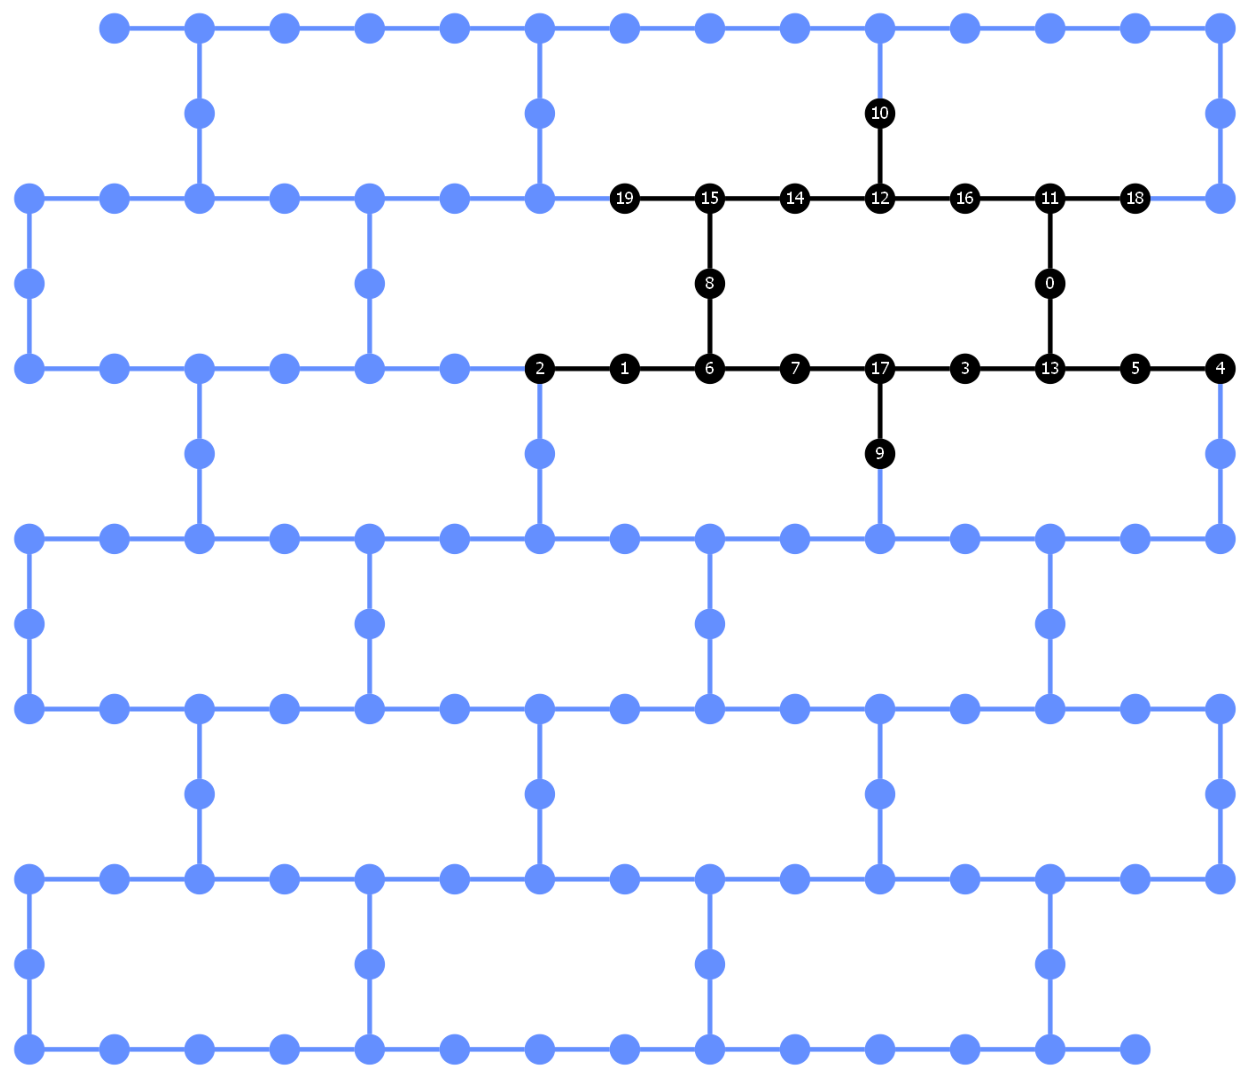

In [82]:
plot_circuit_layout(qc_t, backend)

# Transpiler optimization levels (USE THEM!!!)
* `optimization_level=0`: just maps the circuit to the backend, with no explicit optimization (except whatever optimizations the mapper does)

* `optimization_level=1`: maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.

* `optimization_level=2`: medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.

* `optimization_level=3`: heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

In [85]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
 
# Setting options during primitive initialization
estimator = Estimator(backend, options={"resilience_level": 2})

Error mitigation: https://docs.quantum.ibm.com/guides/configure-error-mitigation

In [87]:
estimator = Estimator(mode=backend)
estimator.options.dynamical_decoupling.enable = True
estimator.options.dynamical_decoupling.sequence_type = "XpXm"

Error suppression: https://docs.quantum.ibm.com/guides/configure-error-suppression

# Exercise 1

* Run the following circuit on sampler and get the counts:
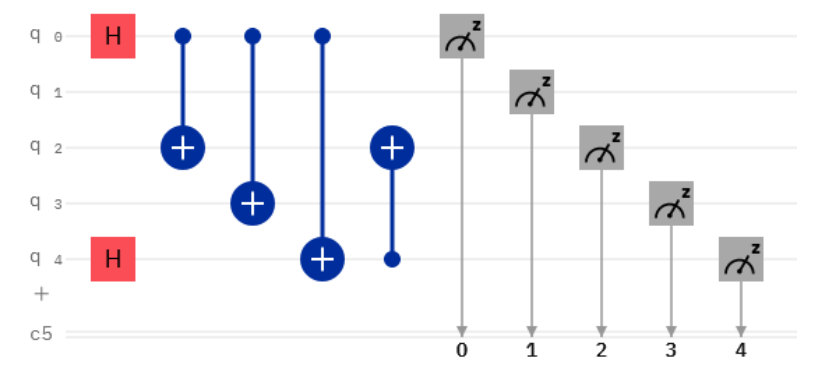
* Next, run it on real backend (or fake backend with noise) in such a way that Hellinger fidelity of this run and simulator is as close to 1 as possible
* You can read about Hellinger fidelity here: https://docs.quantum.ibm.com/api/qiskit/0.31/qiskit.quantum_info.hellinger_fidelity
